#Admission Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
import warnings as w
w.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import io
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [30]:
df = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose(SOP) and (LOR)Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 ) outcome feature to predict

the variables have good corelation to chance of admission

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

there is no null values

#Data Visualisation

<Axes: xlabel='Research', ylabel='Chance of Admit '>

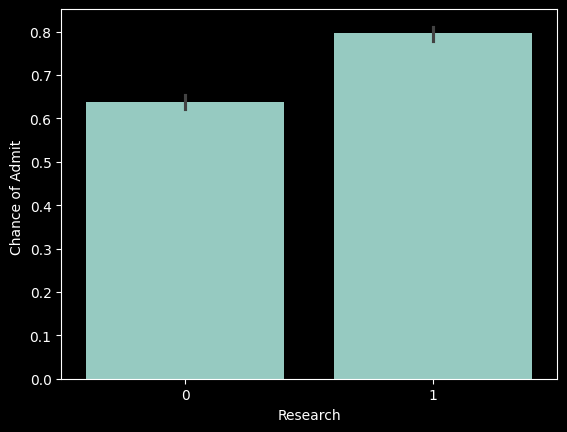

In [6]:
sns.barplot(x="Research", y="Chance of Admit ", data=df)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

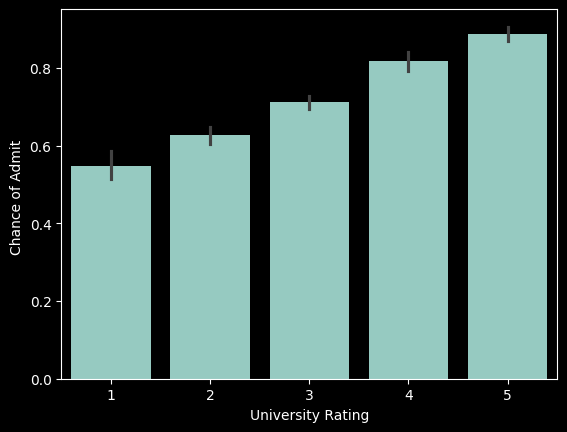

In [10]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=df)

In [15]:
fig =px.scatter(df, x="CGPA", y="Chance of Admit ", color="University Rating")
fig.update_layout(title="CGPA vs Chance of Admit", height = 600, width = 800)
fig.show()

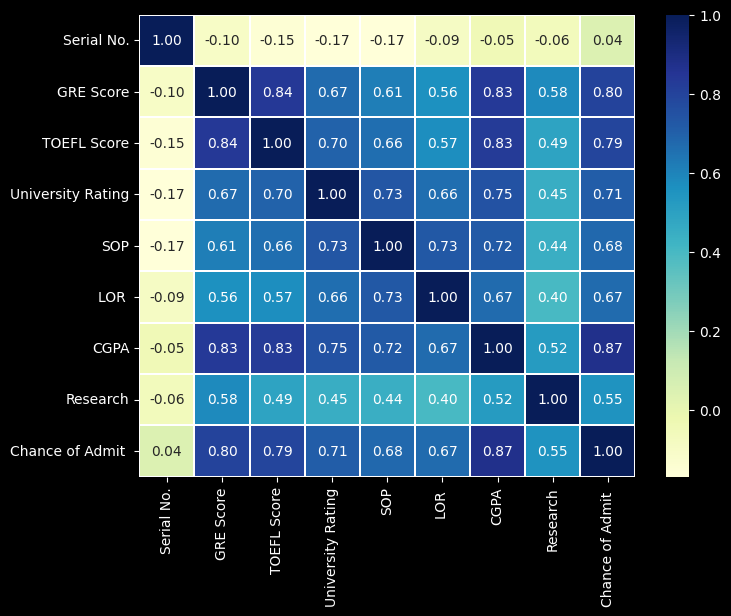

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="YlGnBu")
plt.show()

#Model

In [32]:
y = df['Chance of Admit ']
x = df.drop(['Chance of Admit '], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [37]:
# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 50],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6]
}

# Create the model
model = RandomForestRegressor()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [45]:
model = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300)
model.fit(x_train, y_train);

In [46]:
rf_pred_test = model.predict(x_test)
rf_pred_train = model.predict(x_train)
print("Train Score:", model.score(x_train, y_train))
print("Test Score:", model.score(x_test, y_test))

Train Score: 0.9563871947950839
Test Score: 0.7907625006624972


In [59]:
# Define the grid of parameters to search
param_grid = {
    'max_depth': [None, 5, 10, 6, 4,7,7],
    'min_samples_split': [2, 5, 3, 4, 10],
    'min_samples_leaf': [1, 2, 3, 4, 6]
}

# Create the model
model = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [60]:
dmodel = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=2)
dmodel.fit(x_train, y_train);

In [61]:
dt_ypred_train =dmodel.predict(x_train)
dt_ypred_test =dmodel.predict(x_test)
print("Train Score:", dmodel.score(x_train, y_train))
print("Test Score:", dmodel.score(x_test, y_test))

Train Score: 0.8592729306466941
Test Score: 0.7031395509435003


#Results

Test Accuracy for Random Forest --> 79%

Test Accuracy for Decision Tree Classifier --> 70%